In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target),(test_input, test_target)=keras.datasets.fashion_mnist.load_data()

#4차원으로 바꾸어 주면서 정규화
train_scaled = train_input.reshape(-1, 28,28,1) /255.0
#최저값이 0이라 따로안해도 됨, reshape : -1 (가변:자동으로)

train_scaled,val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=1234)

In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size = (3,3), padding ='same', input_shape=(28,28,1), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

In [3]:
model.add(keras.layers.Conv2D(filters=64, kernel_size = (3,3), padding ='same',  activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

In [4]:
# 완전 연결형(Affine layers)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=100, activation='relu'))
model.add(keras.layers.Dropout(0.4)) #(0,4) 일때 왜 된거지.. 왜 잘나왔지..
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [7]:
history = model.fit(train_scaled, train_target, epochs = 50, batch_size = 100, validation_data = (val_scaled, val_target))

Epoch 1/50
480/480 [==============================] - 12s 25ms/step - loss: 0.6132 - accuracy: 0.7794 - val_loss: 0.3786 - val_accuracy: 0.8649
Epoch 2/50
480/480 [==============================] - 11s 23ms/step - loss: 0.3917 - accuracy: 0.8605 - val_loss: 0.3144 - val_accuracy: 0.8856
Epoch 3/50
480/480 [==============================] - 11s 23ms/step - loss: 0.3380 - accuracy: 0.8798 - val_loss: 0.2868 - val_accuracy: 0.8938
Epoch 4/50
480/480 [==============================] - 11s 23ms/step - loss: 0.3028 - accuracy: 0.8931 - val_loss: 0.2622 - val_accuracy: 0.9024
Epoch 5/50
480/480 [==============================] - 11s 23ms/step - loss: 0.2781 - accuracy: 0.9015 - val_loss: 0.2629 - val_accuracy: 0.9003
Epoch 6/50
480/480 [==============================] - 11s 24ms/step - loss: 0.2592 - accuracy: 0.9072 - val_loss: 0.2427 - val_accuracy: 0.9111
Epoch 7/50
480/480 [==============================] - 11s 24ms/step - loss: 0.2400 - accuracy: 0.9128 - val_loss: 0.2351 - val_accuracy:

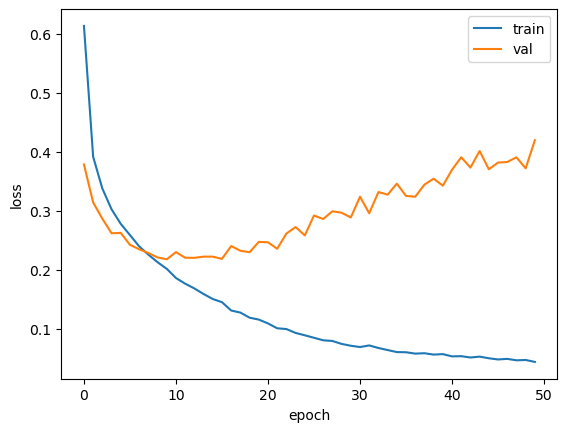

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [9]:
test_scaled = test_input.reshape(-1,28,28,1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 6s 20ms/step - loss: 0.4667 - accuracy: 0.9205


[0.4666568338871002, 0.9204999804496765]